In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler


## With Near Miss Under-Sampling With Evaluation

In [2]:
df= pd.read_csv('heart2022python.csv')
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
0,0,2,4,0,1,9,0,0,0,0,...,10,1.60,71.67,27.99,0,0,1,1,0,0
1,1,2,0,0,1,6,0,0,0,0,...,11,1.78,95.25,30.13,0,0,1,1,0,0
2,1,2,0,0,0,8,0,0,0,0,...,12,1.85,108.86,31.66,1,0,0,1,0,1
3,0,4,5,0,1,9,0,0,0,0,...,13,1.70,90.72,31.32,0,0,1,1,0,1
4,0,3,3,15,1,5,0,0,0,0,...,13,1.55,79.38,33.07,0,0,1,1,0,0


In [3]:
df.drop(['SleepHours',"DeafOrHardOfHearing",'BlindOrVisionDifficulty',"DifficultyConcentrating","DifficultyWalking",'DifficultyDressingBathing',"DifficultyErrands","ECigaretteUsage","ChestScan",'HeightInMeters',"WeightInKilograms","HIVTesting",'FluVaxLast12',"PneumoVaxEver","HighRiskLastYear","CovidPos"],axis=1,inplace=True)




In [4]:
df.shape
df['HadHeartAttack'].value_counts()


HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## splite data

In [6]:
x = df.drop(["HadHeartAttack"] , axis = 1).values
y = df["HadHeartAttack"].values

In [7]:
nr = NearMiss()
x_NM, y_NM = nr.fit_resample(x, y)
x_train5, x_test5, y_train5, y_test5 = train_test_split(x_NM, y_NM, test_size=0.25, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train5 = scaler.fit_transform(x_train5)
x_test5 = scaler.transform(x_test5)
print(len(x_train5), len(y_train5))
print(len(x_test5), len(y_test5))

20110 20110
6704 6704


## Random Forest

In [9]:



# Inicjalizacja modelu z domyślnymi parametrami
rf = RandomForestClassifier()

# Określenie siatki parametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew
    'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
    'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
}

# Utworzenie obiektu GridSearchCV
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
cv_rf.fit(x_train5, y_train5)

# Najlepszy zestaw parametrów
print("Najlepsze parametry: ", cv_rf.best_params_)

# Najlepszy estimator
best_rf = cv_rf.best_estimator_

# Predykcje i ocena modelu
ypred_train = best_rf.predict(x_train5)
ypred_test = best_rf.predict(x_test5)

print("Training Results\n")
print(classification_report(y_train5, ypred_train))
print("Test Results\n")
print(classification_report(y_test5, ypred_test))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test5, ypred_test)
print("Confusion Matrix:\n", conf_matrix)

# # Ocena modelu za pomocą walidacji krzyżowej
# cross_val_scores = cross_val_score(best_rf, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

Najlepsze parametry:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Training Results

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     10036
           1       0.95      0.91      0.93     10074

    accuracy                           0.93     20110
   macro avg       0.93      0.93      0.93     20110
weighted avg       0.93      0.93      0.93     20110

Test Results

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      3371
           1       0.94      0.89      0.91      3333

    accuracy                           0.91      6704
   macro avg       0.91      0.91      0.91      6704
weighted avg       0.91      0.91      0.91      6704

Confusion Matrix:
 [[3172  199]
 [ 381 2952]]


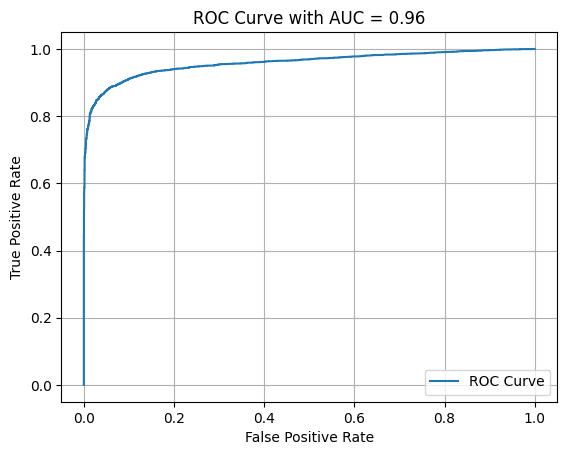

In [10]:


y_proba_test = best_rf.predict_proba(x_test5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [11]:


# Parametry do przetestowania w Grid Search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Utworzenie modelu drzewa decyzyjnego
tree = DecisionTreeClassifier()

# Uruchomienie Grid Search z walidacją krzyżową
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train5, y_train5)

# Wyświetlenie najlepszych parametrów i wyników
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepsza dokładność:", grid_search.best_score_)

# Utworzenie i ocena modelu z najlepszymi parametrami
best_tree = grid_search.best_estimator_
best_tree.fit(x_train5, y_train5)

ypred_train2 = best_tree.predict(x_train5)
ypred_test2 = best_tree.predict(x_test5)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train5, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test5, ypred_test2))

# # Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
# cross_val_scores = cross_val_score(best_tree, x_train5, y_train5, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

Najlepsze parametry: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Najlepsza dokładność: 0.9011437095972153
Training Results

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     10036
           1       0.92      0.89      0.91     10074

    accuracy                           0.91     20110
   macro avg       0.91      0.91      0.91     20110
weighted avg       0.91      0.91      0.91     20110

Testing Results

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3371
           1       0.92      0.88      0.90      3333

    accuracy                           0.90      6704
   macro avg       0.90      0.90      0.90      6704
weighted avg       0.90      0.90      0.90      6704



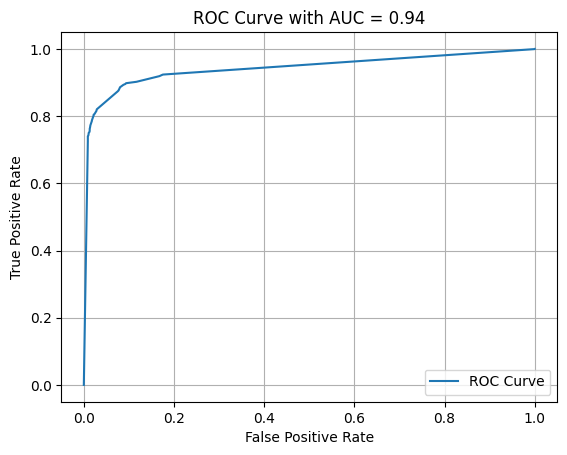

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba_test = best_tree.predict_proba(x_test5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [13]:
Gnb = GaussianNB()
Gnb.fit(x_train5, y_train5)
ypred_train3 = Gnb.predict(x_train5)
y_pred_test3 = Gnb.predict(x_test5)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test5, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.8654534606205251


In [14]:
print("Training Results\n")
print(classification_report(y_train5, ypred_train3))

Training Results

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     10036
           1       0.94      0.80      0.86     10074

    accuracy                           0.87     20110
   macro avg       0.88      0.87      0.87     20110
weighted avg       0.88      0.87      0.87     20110



In [15]:
print('Testing Results\n')
print(classification_report(y_test5, y_pred_test3))

Testing Results

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3371
           1       0.92      0.80      0.85      3333

    accuracy                           0.87      6704
   macro avg       0.87      0.87      0.86      6704
weighted avg       0.87      0.87      0.86      6704



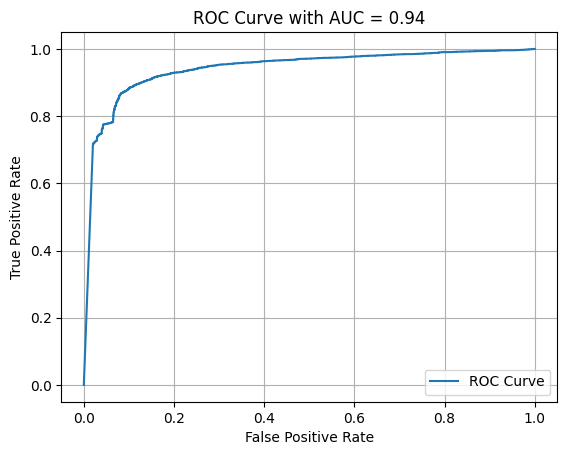

In [16]:
# cross_val_scores = cross_val_score(Gnb, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = Gnb.predict_proba(x_test5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST

Najlepsze parametry:  {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Accuracy on Training set:  0.929985082048732
Accuracy on Test set:  0.9167661097852029

Training Results

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     10036
           1       0.96      0.90      0.93     10074

    accuracy                           0.93     20110
   macro avg       0.93      0.93      0.93     20110
weighted avg       0.93      0.93      0.93     20110

Testing Results

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3371
           1       0.95      0.88      0.91      3333

    accuracy                           0.92      6704
   macro avg       0.92      0.92      0.92      6704
weighted avg       0.92      0.92      0.92      6704



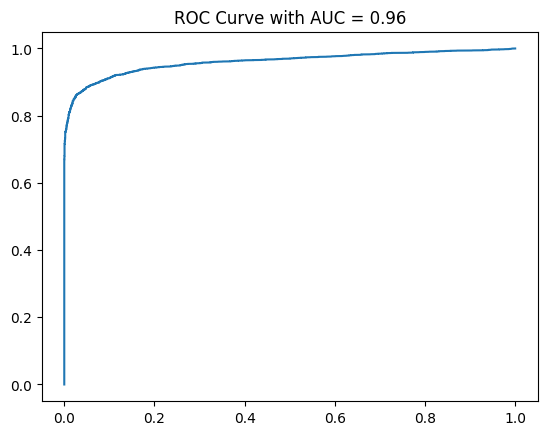

In [17]:

xg = XGBClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train5, y_train5)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_xg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train5)
y_pred_test4 = best_xg.predict(x_test5)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train5, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test5, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train5, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test5, y_pred_test4))

# cross_val_scores = cross_val_score(best_xg, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test5, y_proba_test4)))
plt.show()

## logistic regression


Najlepsze parametry:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Training set:  0.9105420188960716
Accuracy on Test set:  0.9061754176610979

Training Results

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     10036
           1       0.95      0.87      0.91     10074

    accuracy                           0.91     20110
   macro avg       0.91      0.91      0.91     20110
weighted avg       0.91      0.91      0.91     20110

Testing Results

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3371
           1       0.94      0.86      0.90      3333

    accuracy                           0.91      6704
   macro avg       0.91      0.91      0.91      6704
weighted avg       0.91      0.91      0.91      6704



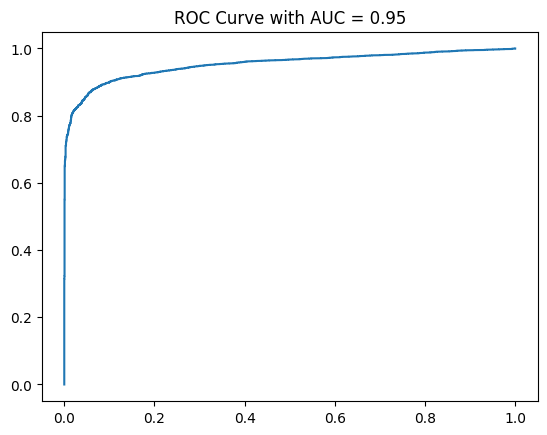

In [18]:


# Inicjalizacja modelu regresji logistycznej
lg = LogisticRegression()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
    'penalty': ['l1', 'l2'],       # Typ regularyzacji
    'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train5, y_train5)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_lg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train5)
y_pred_test4 = best_lg.predict(x_test5)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train5, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test5, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train5, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test5, y_pred_test4))

# cross_val_scores = cross_val_score(best_lg, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test5, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

Najlepsze parametry:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy on Training set:  0.9294878170064644
Accuracy on Test set:  0.915871121718377

Training Results

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     10036
           1       0.96      0.90      0.93     10074

    accuracy                           0.93     20110
   macro avg       0.93      0.93      0.93     20110
weighted avg       0.93      0.93      0.93     20110

Testing Results

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3371
           1       0.95      0.88      0.91      3333

    accuracy                           0.92      6704
   macro avg       0.92      0.92      0.92      6704
weighted avg       0.92      0.92      0.92      6704



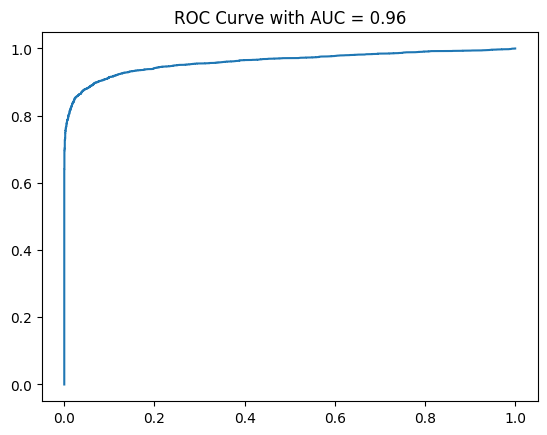

In [19]:


# Inicjalizacja modelu Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
    'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
    'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train5, y_train5)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_gb = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train5)
y_pred_test6 = best_gb.predict(x_test5)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train5, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test5, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train5, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test5, y_pred_test6))

# cross_val_scores = cross_val_score(best_gb, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test5, y_proba_test6)))
plt.show()

## KNN

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train5, y_train5)


KNeighborsClassifier()

In [21]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)


In [22]:
grid_cv.fit(x_train5, 
            y_train5)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [23]:
grid_cv.best_score_


0.8727853412808372

In [24]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier()

In [25]:
ypred_train7 = grid_cv.predict(x_train5)
y_pred_test7 = grid_cv.predict(x_test5)
print("XGBClassifier Accuracy: ",accuracy_score(y_test5, y_pred_test7))

XGBClassifier Accuracy:  0.8803699284009546


In [26]:
print("Training Results\n")
print(classification_report(y_train5, ypred_train7))

Training Results

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     10036
           1       0.96      0.86      0.91     10074

    accuracy                           0.91     20110
   macro avg       0.92      0.91      0.91     20110
weighted avg       0.92      0.91      0.91     20110



In [27]:
print("Training Results\n")
print(classification_report(y_test5, y_pred_test7))

Training Results

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3371
           1       0.94      0.81      0.87      3333

    accuracy                           0.88      6704
   macro avg       0.89      0.88      0.88      6704
weighted avg       0.89      0.88      0.88      6704



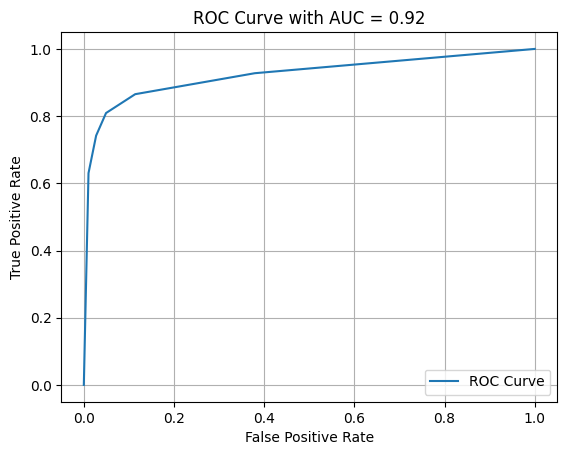

In [28]:
# cross_val_scores = cross_val_score(grid_cv, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = grid_cv.predict_proba(x_test5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [29]:
ann = tf.keras.models.Sequential()

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [31]:
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))

In [32]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [33]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [34]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
ann.fit(x_train5, y_train5, batch_size = 32, epochs=100,
          validation_data=(x_test5, y_test5), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


629/629 [==============================] - 1s 1ms/step - loss: 0.3983 - accuracy: 0.8261 - val_loss: 0.2799 - val_accuracy: 0.8887
Epoch 2/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2597 - accuracy: 0.8942 - val_loss: 0.2651 - val_accuracy: 0.8956
Epoch 3/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2505 - accuracy: 0.9006 - val_loss: 0.2600 - val_accuracy: 0.8971
Epoch 4/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2451 - accuracy: 0.9033 - val_loss: 0.2534 - val_accuracy: 0.9027
Epoch 5/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2417 - accuracy: 0.9049 - val_loss: 0.2525 - val_accuracy: 0.9017
Epoch 6/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2386 - accuracy: 0.9066 - val_loss: 0.2477 - val_accuracy: 0.9039
Epoch 7/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2361 - accuracy: 0.9086 - val_loss: 0.2475 - val_accuracy: 0.90

In [36]:
ypred_train8 = ann.predict(x_train5)
y_pred_test8 = ann.predict(x_test5)

y_pred_test8 = (y_pred_test8 > 0.5)
ypred_train8 = (ypred_train8 > 0.5)
print(np.concatenate((y_pred_test8.reshape(len(y_pred_test8),1), y_test5.reshape(len(y_test5),1)),1))

210/210 [==============================] - 0s 732us/step
[[1 1]
 [1 1]
 [1 1]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [37]:
accuracy_score(y_test5, y_pred_test8)

0.9115453460620525

In [38]:
print("Training Results\n")
print(classification_report(y_train5, ypred_train8))

Training Results

              precision    recall  f1-score   support

           0       0.88      0.97      0.93     10036
           1       0.97      0.87      0.92     10074

    accuracy                           0.92     20110
   macro avg       0.93      0.92      0.92     20110
weighted avg       0.93      0.92      0.92     20110



In [39]:
print('Testing Results\n')
print(classification_report(y_test5, y_pred_test8))

Testing Results

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      3371
           1       0.96      0.86      0.91      3333

    accuracy                           0.91      6704
   macro avg       0.92      0.91      0.91      6704
weighted avg       0.92      0.91      0.91      6704



210/210 [==============================] - 0s 753us/step


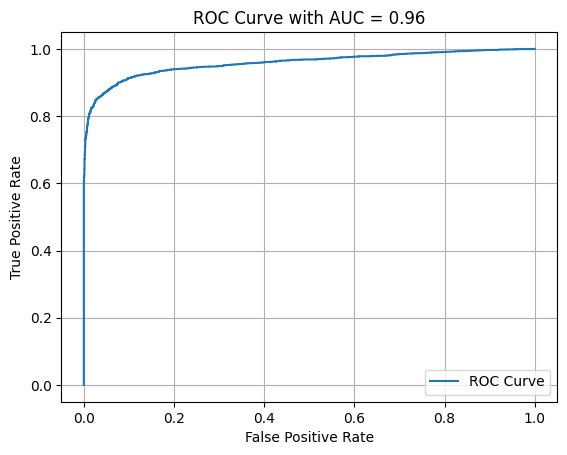

In [40]:
# cross_val_scores = cross_val_score(ann, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = ann.predict(x_test5).flatten()

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [41]:

tf.random.set_seed(42)



model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train5,y_train5,epochs = 100)

Epoch 1/100
629/629 [==============================] - 1s 1ms/step - loss: 0.4233 - accuracy: 0.8189
Epoch 2/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2576 - accuracy: 0.8957
Epoch 3/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2448 - accuracy: 0.9036
Epoch 4/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2383 - accuracy: 0.9057
Epoch 5/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2328 - accuracy: 0.9081
Epoch 6/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2292 - accuracy: 0.9101
Epoch 7/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2269 - accuracy: 0.9116
Epoch 8/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2242 - accuracy: 0.9129
Epoch 9/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2236 - accuracy: 0.9139
Epoch 10/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2218 - accura

In [42]:
model_2.evaluate(x_test5,y_test5)

210/210 [==============================] - 0s 904us/step - loss: 0.2296 - accuracy: 0.9142


[0.22964255511760712, 0.9142302870750427]

In [43]:
ypred_train12 = model_2.predict(x_train5)
y_pred_test12 = model_2.predict(x_test5)

y_pred_test12 = (y_pred_test12 > 0.5)
ypred_train12 = (ypred_train12 > 0.5)

print(classification_report(y_train5,ypred_train12))
print(classification_report(y_test5,y_pred_test12))

210/210 [==============================] - 0s 814us/step
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     10036
           1       0.96      0.89      0.92     10074

    accuracy                           0.92     20110
   macro avg       0.93      0.92      0.92     20110
weighted avg       0.93      0.92      0.92     20110

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3371
           1       0.95      0.87      0.91      3333

    accuracy                           0.91      6704
   macro avg       0.92      0.91      0.91      6704
weighted avg       0.92      0.91      0.91      6704



210/210 [==============================] - 0s 748us/step


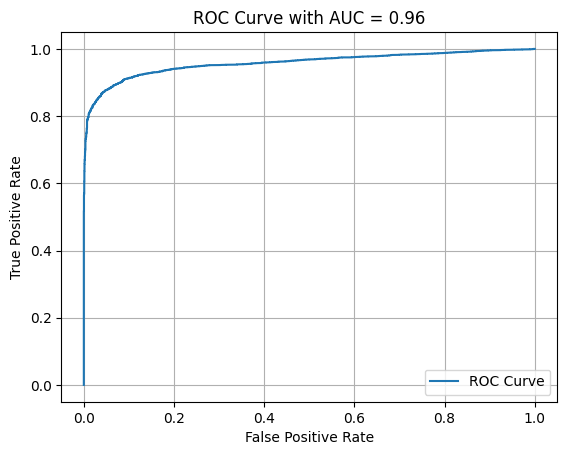

In [44]:
# cross_val_scores = cross_val_score(model_2, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model_2.predict(x_test5).flatten()

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [45]:
model1 = Sequential()
model1.add(Dense(units=20,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=15,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [46]:
model1.fit(x=x_train5, 
          y=y_train5, 
          epochs=100,
          validation_data=(x_test5, y_test5), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
629/629 [==============================] - 1s 2ms/step - loss: 0.5265 - val_loss: 0.3053
Epoch 2/100
629/629 [==============================] - 1s 1ms/step - loss: 0.3617 - val_loss: 0.2818
Epoch 3/100
629/629 [==============================] - 1s 1ms/step - loss: 0.3298 - val_loss: 0.2716
Epoch 4/100
629/629 [==============================] - 1s 1ms/step - loss: 0.3192 - val_loss: 0.2655
Epoch 5/100
629/629 [==============================] - 1s 1ms/step - loss: 0.3074 - val_loss: 0.2619
Epoch 6/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2995 - val_loss: 0.2577
Epoch 7/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2975 - val_loss: 0.2543
Epoch 8/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2884 - val_loss: 0.2569
Epoch 9/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2844 - val_loss: 0.2497
Epoch 10/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2891 - val_lo

In [47]:
ypred_train13 = model1.predict(x_train5)
y_pred_test13 = model1.predict(x_test5)

y_pred_test13 = (y_pred_test13 > 0.5)
ypred_train13 = (ypred_train13 > 0.5)

print(classification_report(y_train5,ypred_train13))
print(classification_report(y_test5,y_pred_test13))

210/210 [==============================] - 0s 763us/step
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     10036
           1       0.93      0.90      0.92     10074

    accuracy                           0.92     20110
   macro avg       0.92      0.92      0.92     20110
weighted avg       0.92      0.92      0.92     20110

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3371
           1       0.93      0.89      0.91      3333

    accuracy                           0.91      6704
   macro avg       0.91      0.91      0.91      6704
weighted avg       0.91      0.91      0.91      6704



210/210 [==============================] - 0s 819us/step


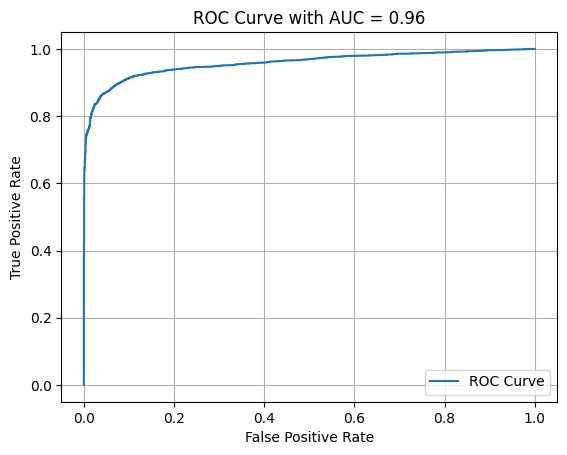

In [48]:
# cross_val_scores = cross_val_score(model1, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model1.predict(x_test5).flatten()

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [49]:

tf.random.set_seed(42)



model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(40,activation = 'relu'),
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train5,y_train5,epochs = 100)

Epoch 1/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2937 - accuracy: 0.8849
Epoch 2/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2443 - accuracy: 0.9023
Epoch 3/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2351 - accuracy: 0.9071
Epoch 4/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2322 - accuracy: 0.9091
Epoch 5/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2269 - accuracy: 0.9113
Epoch 6/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2230 - accuracy: 0.9129
Epoch 7/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2206 - accuracy: 0.9140
Epoch 8/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2183 - accuracy: 0.9159
Epoch 9/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2175 - accuracy: 0.9143
Epoch 10/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2162 - accura

In [50]:
model_22.evaluate(x_test5,y_test5)

210/210 [==============================] - 0s 968us/step - loss: 0.2545 - accuracy: 0.9089


[0.2544872760772705, 0.9088603854179382]

In [51]:
ypred_train22 = model_22.predict(x_train5)
y_pred_test22 = model_22.predict(x_test5)

y_pred_test22 = (y_pred_test22 > 0.5)
ypred_train22 = (ypred_train22 > 0.5)

print(classification_report(y_train5,ypred_train22))
print(classification_report(y_test5,y_pred_test22))

210/210 [==============================] - 0s 835us/step
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10036
           1       0.97      0.88      0.92     10074

    accuracy                           0.93     20110
   macro avg       0.93      0.93      0.93     20110
weighted avg       0.93      0.93      0.93     20110

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3371
           1       0.96      0.85      0.90      3333

    accuracy                           0.91      6704
   macro avg       0.91      0.91      0.91      6704
weighted avg       0.91      0.91      0.91      6704



210/210 [==============================] - 0s 887us/step


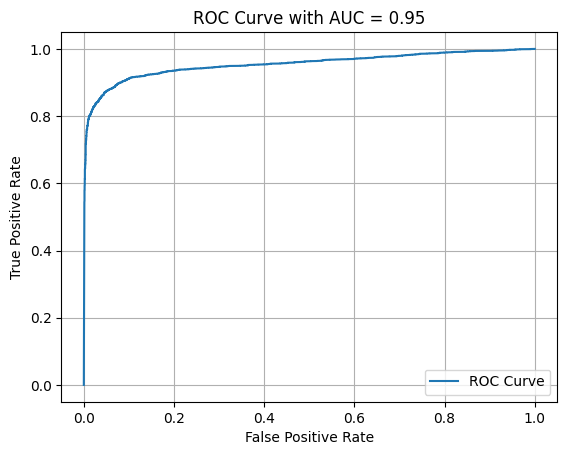

In [52]:
# cross_val_scores = cross_val_score(model_22, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model_22.predict(x_test5).flatten()

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [53]:
model2 = Sequential()



model2.add(Dense(20,  activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
model2.fit(x=x_train5, 
          y=y_train5, 
          epochs=100,
          validation_data=(x_test5, y_test5), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
629/629 [==============================] - 1s 2ms/step - loss: 0.3996 - val_loss: 0.2861
Epoch 2/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2912 - val_loss: 0.2697
Epoch 3/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2743 - val_loss: 0.2638
Epoch 4/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2661 - val_loss: 0.2577
Epoch 5/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2594 - val_loss: 0.2535
Epoch 6/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2567 - val_loss: 0.2558
Epoch 7/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2510 - val_loss: 0.2480
Epoch 8/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2477 - val_loss: 0.2474
Epoch 9/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2462 - val_loss: 0.2439
Epoch 10/100
629/629 [==============================] - 1s 1ms/step - loss: 0.2428 - val_lo

In [55]:
ypred_train14 = model2.predict(x_train5)
y_pred_test14 = model2.predict(x_test5)

y_pred_test14 = (y_pred_test14 > 0.5)
ypred_train14 = (ypred_train14 > 0.5)

print("Training Results\n")
print(classification_report(y_train5,ypred_train14))
print("Testing Results\n")
print(classification_report(y_test5,y_pred_test14))

210/210 [==============================] - 0s 756us/step
Training Results

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10036
           1       0.96      0.88      0.92     10074

    accuracy                           0.92     20110
   macro avg       0.93      0.92      0.92     20110
weighted avg       0.93      0.92      0.92     20110

Testing Results

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      3371
           1       0.95      0.86      0.91      3333

    accuracy                           0.91      6704
   macro avg       0.91      0.91      0.91      6704
weighted avg       0.91      0.91      0.91      6704



210/210 [==============================] - 0s 736us/step


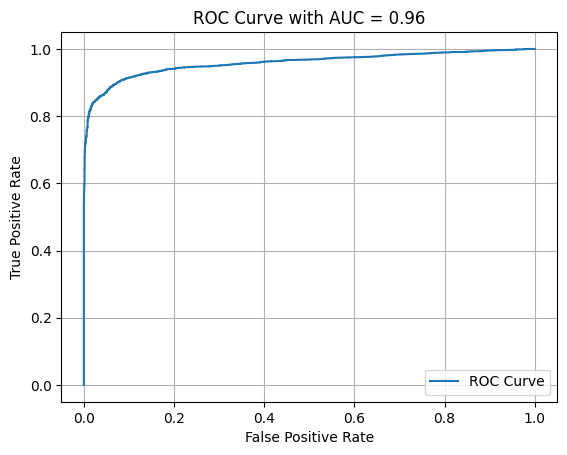

In [56]:
# cross_val_scores = cross_val_score(model2, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model2.predict(x_test5).flatten()

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [57]:
model = SVC(probability=True)

In [58]:
model.fit(x_train5,y_train5)

SVC(probability=True)

In [59]:


ypred_train = model.predict(x_train5)
y_pred_test = model.predict(x_test5)


print(classification_report(y_train5,ypred_train))
print(classification_report(y_test5,y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     10036
           1       0.91      0.89      0.90     10074

    accuracy                           0.90     20110
   macro avg       0.90      0.90      0.90     20110
weighted avg       0.90      0.90      0.90     20110

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3371
           1       0.91      0.88      0.89      3333

    accuracy                           0.90      6704
   macro avg       0.90      0.90      0.90      6704
weighted avg       0.90      0.90      0.90      6704



In [60]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [61]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [62]:
grid.fit(x_train5,y_train5)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.889 total time=   2.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.894 total time=   2.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   2.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.885 total time=   2.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.891 total time=   2.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.882 total time=   2.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.885 total time=   2.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.885 total time=   2.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.881 total time=   2.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.885 total time=   2.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.864 total time=   4.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [63]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [64]:
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [65]:
ypred_train = grid.predict(x_train5)
y_pred_test = grid.predict(x_test5)


print(classification_report(y_train5,ypred_train))
print(classification_report(y_test5,y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     10036
           1       0.94      0.89      0.91     10074

    accuracy                           0.91     20110
   macro avg       0.92      0.91      0.91     20110
weighted avg       0.92      0.91      0.91     20110

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3371
           1       0.94      0.87      0.90      3333

    accuracy                           0.91      6704
   macro avg       0.91      0.91      0.91      6704
weighted avg       0.91      0.91      0.91      6704



Training Results

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     10036
           1       0.94      0.89      0.91     10074

    accuracy                           0.91     20110
   macro avg       0.92      0.91      0.91     20110
weighted avg       0.92      0.91      0.91     20110

Testing Results

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3371
           1       0.94      0.87      0.90      3333

    accuracy                           0.91      6704
   macro avg       0.91      0.91      0.91      6704
weighted avg       0.91      0.91      0.91      6704



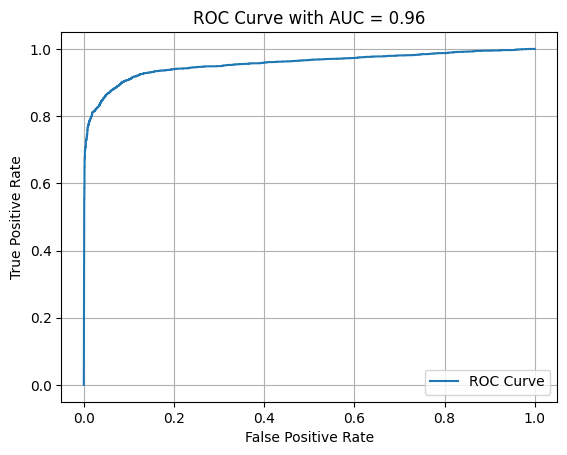

In [67]:
model3 = SVC(C=1000, gamma=0.01, kernel='rbf', probability=True)
model3.fit(x_train5, y_train5)

ypred_train14 = model3.predict(x_train5)
y_pred_test14 = model3.predict(x_test5)

print("Training Results\n")
print(classification_report(y_train5, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test5, y_pred_test14))

# cross_val_scores = cross_val_score(model3, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = model3.predict_proba(x_test5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()